In [1]:
# imports
import os, sys
import re
import ast
import datetime
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import csv 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
import plotly.graph_objs as go
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot


Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/asheshchoudhury/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#from googlesearch import search
#from google import google as g
#from textblob import TextBlob
#import texttable as tt
from time import sleep

In [4]:
filepath = 'C:/Users/asheshchoudhury/Desktop/Capstone/allArticles.txt'

In [5]:
# Start timer to get total time for running all code
t0 = datetime.datetime.now()
#Train
#df=pd.read_csv("C:/Users/asheshchoudhury/Desktop/Capstone-new/w210-final/data/ExtractedTweets.csv")
df=pd.read_csv('/home/asheshchoudhury/ExtractedTweets.csv')
df.head()
#T =[]
#for i in range(len(df)):
#    T.append(clean_text(df['Tweet'][i]))
#df['Tweet_cleaned'] = T
#df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [6]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 10000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Tweet'])
word_index = tokenizer.word_index
#len(word_index)
print('Found %s unique tokens.'% len(word_index))
print('Found {} unique tokens.' .format(len(word_index)))
#X = tokenizer.texts_to_sequences(df['Speech text'])
#X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
#print('Shape of data tensor:', X.shape)
df['Party_numeric D=0 R=1'] = np.where(df['Party'] =="Democrat", 0, 1)
df.head()

#X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
#print(X_train.shape,Y_train.shape)
#print(X_test.shape,Y_test.shape)

Found 140097 unique tokens.
Found 140097 unique tokens.


,Party,Handle,Tweet,Party_numeric D=0 R=1
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",0
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,0
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,0
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,0
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,0


In [7]:
def remove_special_characters(text, remove_digits=False):
    # Remove special characters from text
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [8]:
#import spacy
#nlp = spacy.load('en_core_web_md', parse=True, tag=True, entity=True)


#def lemmatize_text(text):
    # Get base form for word variants (i.e. running ==> run, cats ==> cat, etc.)
#    text = nlp(text)
#    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
#    return text

In [9]:
import nltk
from nltk.tokenize.toktok import ToktokTokenizer

tokenizer1 = ToktokTokenizer()
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)

# Remove words 'no' and 'not' from stopword list as these may change meaning of words/phrases
stopword_list = nltk.corpus.stopwords.words('english')
for word in ['no', 'not', 'he', 'she', 'his', 'her', 'hers']:
    stopword_list.remove(word)

# Add characters not captured in special character removal to stop list
stopword_list += ['[', ']', "\\"]                     

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer1.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [10]:
import unicodedata

clean_text = []

for text in df['Tweet']:
    # Remove accent characters => Expand Contractions => Remove special characters => Lammatize Text => Remove Stop Words
    no_accent_chars = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #expanded_text = expand_contractions(no_accent_chars)
    expanded_text = no_accent_chars 
    no_special_chars = remove_special_characters(expanded_text, remove_digits=False)
    #lem_text = lemmatize_text(no_special_chars)
    #filtered_text = remove_stopwords(lem_text)
    filtered_text = remove_stopwords(no_special_chars)
    
    # Make all text lowercase
    lowercase_text = filtered_text.lower()
    
    # Split text into list of words
    words = lowercase_text.split()
    clean_text.append(words)

# Add cleaned text to dataframe
df['clean_tweet'] = clean_text
df.head()

,Party,Handle,Tweet,Party_numeric D=0 R=1,clean_tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",0,"[today, senate, dems, vote, savetheinternet, p..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,0,"[rt, winterhavensun, winter, resident, alta, v..."
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,0,"[rt, nbclatino, repdarrensoto, noted, hurrican..."
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,0,"[rt, nalcabpolicy, meeting, repdarrensoto, tha..."
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,0,"[rt, vegalteno, hurricane, season, starts, jun..."


In [11]:
# Set variables for dependent and independent variables
target = df['Party_numeric D=0 R=1']
data = df['clean_tweet'].values

In [12]:
# Create Bigrams as Certain terms may come up that make more sense together than independently 
#import gensim
#from gensim.models import phrases
#from gensim.models.phrases import Phrases

# Identify and create bigrams
#bigrams = phrases.Phrases(data)
#bigrams = data

bigrams_data = []


for i in range(len(data)):
#    bigrams_data.append(bigrams[data[i]])
    bigrams_data.append([data[i]])
    
bigrams_data = np.array(bigrams_data)

# Get word count for longest sample after stop words removed and bigrams created
max_len = 0
for bigram in bigrams_data:
    tumpa = 0
    for bigram1 in bigram:
        for bigram2 in bigram1:
            tumpa = tumpa + 1
        
        max_len = tumpa if tumpa > max_len else max_len
#print(max_len)
 
print('Maximum Sample Word Count: {}' .format(max_len))
#print('Sample:\n' ' '.join([bigram for bigram in bigrams_data[0]]))

Maximum Sample Word Count: 30


In [13]:
# Create variable to hold set of all unique words in sample corpus
#total_vocabulary = set(word for text in bigrams_data for word in text)
total_vocabulary =[]
for bigram in bigrams_data:
    for bigram1 in bigram:
        for bigram2 in bigram1:
            total_vocabulary.append(bigram2)
#len(total_vocabulary)

print('Total Words in Vocabulary:{}' .format(len(total_vocabulary)))

Total Words in Vocabulary:1031561


In [14]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove*.zip
# Create dictionary of vectors from GloVe based on total vocabulary
embeddings_index = {}
word_count = 0
f = open('/home/asheshchoudhury/glove.6B.50d.txt', encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    if word in total_vocabulary:
        if word_count > MAX_NB_WORDS:
            break
        elif word_count <= MAX_NB_WORDS:
            #print(word_count)
            word_count = word_count + 1
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
f.close()

print('Total Words in Embedding Index: {}' .format(len(embeddings_index)))

Total Words in Embedding Index: 10001


In [15]:
class W2vVectorizer(object):
    # Assign GloVe vector to each word in vocabulary, or zero vector to words/bigrams not found
    def __init__(self, w2v):
        # takes in a dictionary of words and vectors as input
        self.w2v = w2v
        if len(w2v) == 0:
            self.dimensions = 0
        else:
            self.dimensions = len(w2v[next(iter(embeddings_index))])
    
    # Following required to allow for implementation of a fit method
    # Cannot be used in SKLearn Pipeline otherwise 
    def fit(self, X, y):
        return self
            
    def transform(self, X):
        return np.array([
            np.mean([self.w2v[w] for w in words if w in self.w2v]
                   or [np.zeros(self.dimensions)], axis=0) for words in X])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB


rf  = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ("Random Forest", RandomForestClassifier(n_estimators=100, verbose=True, n_jobs=-1))])
svc = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ('Support Vector Machine', SVC(gamma='scale'))])
#lr  = Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
#                ('Logistic Regression', LogisticRegression(n_jobs=-1))])
nb =  Pipeline([("Word2Vec Vectorizer", W2vVectorizer(embeddings_index)),
                ('Naive Bayse', GaussianNB())])

In [17]:
models = [('Random Forest', rf),
          ("Support Vector Machine", svc),
#          ("Logistic Regression", lr)]
          ("Naive Bayse", nb)]


In [18]:
# Use 2 cross-validations to gauge performance
scores = [(name, cross_val_score(model, data, target, cv=2).mean()) for name, model in models]
scores

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.7s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished


[('Random Forest', 0.6175109877399954),
 ('Support Vector Machine', 0.6221027064538516),
 ('Naive Bayse', 0.5648160999306038)]

In [19]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding, GRU
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, Conv1D, MaxPooling1D, Flatten
from keras.models import Model, Sequential, load_model
from keras.metrics import categorical_crossentropy
from keras.preprocessing import text
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam, RMSprop

In [20]:
# Convert each sample's list of bigrams into a string
bigrams_joined = []

for a in bigrams_data:
    for b in a:
        bigrams_joined.append(' '.join(b))

# Remove underscore from filters and no need to convert to lowercase
tokenizer = text.Tokenizer(filters='!"#%&()*+,./:;<=>?@[\\]^`{|}~\t\n', lower=False)
tokenizer.fit_on_texts(bigrams_joined)
sequences = tokenizer.texts_to_sequences(bigrams_joined)

word_index = tokenizer.word_index
print('Total Words in Vocabulary: {}' .format(len(word_index)))

Total Words in Vocabulary: 132892


In [21]:
X_t = pad_sequences(sequences, maxlen=max_len, padding='post')
X_t_df = pd.DataFrame(X_t)
X_t_df['bigrams'] = bigrams_data
X_t_df['text'] = df.reset_index(drop=True)['clean_tweet']
X_t_df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,bigrams,text
0,3,135,1030,76,2719,24,25,2848,554,83,...,0,0,0,0,0,0,0,0,"[today, senate, dems, vote, savetheinternet, p...","[today, senate, dems, vote, savetheinternet, p..."
1,1,17685,1882,2574,17686,5222,1082,29,814,1126,...,0,0,0,0,0,0,0,0,"[rt, winterhavensun, winter, resident, alta, v...","[rt, winterhavensun, winter, resident, alta, v..."
2,1,9947,1711,8652,744,2397,711,5223,1502,321,...,0,0,0,0,0,0,0,0,"[rt, nbclatino, repdarrensoto, noted, hurrican...","[rt, nbclatino, repdarrensoto, noted, hurrican..."
3,1,32151,53,1711,19,256,17,116,32152,1922,...,0,0,0,0,0,0,0,0,"[rt, nalcabpolicy, meeting, repdarrensoto, tha...","[rt, nalcabpolicy, meeting, repdarrensoto, tha..."
4,1,32156,744,876,1574,2183,628,843,8113,32157,...,0,0,0,0,0,0,0,0,"[rt, vegalteno, hurricane, season, starts, jun...","[rt, vegalteno, hurricane, season, starts, jun..."


In [22]:
# Set target variable
y = pd.get_dummies(target).values

In [23]:
#Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_t_df, y, test_size=.5)

X_train_text = X_train[['text', 'bigrams']]
X_train = X_train[X_train.columns[:-2]]

X_test_text = X_test[['text', 'bigrams']]
X_test = X_test[X_test.columns[:-2]]


In [24]:
# Create matrix of random vectors which matches size of the word index
embedding_matrix = np.random.random((len(word_index) + 1, 50))
for word, i in word_index.items():
    
    # For each word found in the embedding index, assign the known vector
    embedding_vector = embeddings_index.get(word)
    
    # Otherwise, keep the randomly assigned vector
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
embedding_layer = Embedding(len(word_index) + 1, 
                            100, weights = [embedding_matrix], 
                            input_length = max_len, trainable=True)

In [25]:
# Start from Network Development Strategy Synopsis

In [25]:
#CNN

#def create_cnn_model(cdim=128, ksize=5, pool1=5, pool2=35, density=128, lr=.001, epochs=100, batch_size=128, validation_split=.3, patience=5, verbose=0):
def create_cnn_model(cdim=128, ksize=5, pool1=5, pool2=35, density=128, lr=.001, epochs=1, batch_size=128, validation_split=.2, patience=5, verbose=0):
    
    # Start Timer
    start = datetime.datetime.now()
    #print('inside the loop-1')
    
    # Display Hyperparameter Settings
    #print('Convolution Dimensions\tWindow Size\tPool 1\t\tPool 2\t\tDensity')
    #print(cdim,ksize,pool1,pool2,density, sep ='\t\t\t')
    

    
    # Build Model
    input_ = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(input_)
    #print('inside the loop-2')
    
    x = Conv1D(cdim, ksize, activation='relu')(embedded_sequences)
    x = MaxPooling1D(pool1, padding='same')(x)
    x = Conv1D(cdim, ksize, activation='relu')(x)
    x = MaxPooling1D(pool1, padding='same')(x)
    x = Conv1D(cdim, ksize, activation='relu')(x)
    x = MaxPooling1D(pool2, padding='same')(x)
    x = Flatten()(x)
    x = Dense(density, activation='relu')(x)
    #x = Dense(num_classes, activation='softmax')(x)
    x = Dense(2, activation='softmax')(x)
    #print('inside the loop-3')
    model = Model(inputs=input_, outputs=x)
    #print('inside the loop-4')
    
    # Compile Model
    history = model.compile(loss='categorical_crossentropy', 
                            optimizer=Adam(lr=lr), 
                            metrics=['accuracy'])
    #print('inside the loop-5')
    # Create Checkpoints & Stopping Parameters
    #checkpoints_path = f'models/cnn_best_{p1}_{p2}.hdf5'
    #checkpoints_path = f'models/cnn_best_.hdf5'

    #checkpoint = ModelCheckpoint(checkpoints_path, 
    #                             monitor='val_loss', 
    #                             verbose=verbose, 
    #                             save_best_only=True, 
    #                             mode='min')

    #early_stopping = EarlyStopping(monitor='val_loss', 
    #                               mode='min', 
    #                               patience=patience)
    
    #callbacks = [checkpoint, early_stopping]
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)]
    #print('inside the loop-6')
    
    # Fit Model
    history = model.fit(X_train, y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_split=validation_split, 
                        callbacks=callbacks, 
                        verbose=verbose)
    #print('inside the loop-7')
    # Evaluate Model
    results = model.evaluate(X_test, y_test)
    #print(results)
    # End Timer
    end = datetime.datetime.now()
    time_taken = end - start
    # Display Results
    print('Time to Complete:', time_taken)
    #print(f'Loss:\t{results[0]:.2f}\tAccuracy:\t{results[1]:.4f}\n')
    #print('Loss:\t' results[0]:.2f 'Accuracy:\t' results[1]:.4f)
    #print('Loss:{0.2f}\t' .format(results[0]), 'Accuracy:{0.4f}\t' .format(results[1]))
    print('Printing Loss')
    print('Loss:' ,results[0])
    print('Printing Accuracy')
    print('Accuracy:',results[1])



    return model, history, results, time_taken


In [26]:
# Display total time elapsed since program started
t1 = datetime.datetime.now()
print('Time Elapsed: {}' .format(t1 - t0))

# Hyperparameter grid
#cdims = [8, 16]
#ksizes = [3, 5, 7]
#pools1 = [3, 5, 7]
#pools2 = [5, 10]
#densities = [4, 8]
# Hyperparameter grid
cdims = [128, 256]
ksizes = [3, 5, 7]
pools1 = [3, 5, 7]
pools2 = [25, 35]
densities = [64, 128]


# Create dictionary for tracking CNN results and hyperparameters
cnn_results = {'Convolution Dimensions': [], 
               'Window Size': [], 
               'Pool 1': [], 
               'Pool 2': [], 
               'Density': [], 
               'Time': [], 
               'Loss': [], 
               'Accuracy': []}

for cdim in cdims:
    for ksize in ksizes:
        for pool1 in pools1:
            for pool2 in pools2:
                for density in densities:
                    
                    try:
                        #print('Before calling cnn')
                        cnn_model, cnn_history, cnn_eval, cnn_time = create_cnn_model(cdim=cdim, 
                                                                                      ksize=ksize, 
                                                                                      pool1=pool1, 
                                                                                      pool2=pool2, 
                                                                                      density=density)
                        #print('After calling cnn')
                        cnn_results['Convolution Dimensions'].append(cdim)
                        cnn_results['Window Size'].append(ksize)
                        cnn_results['Pool 1'].append(pool1)
                        cnn_results['Pool 2'].append(pool2)
                        cnn_results['Density'].append(density)
                        cnn_results['Loss'].append(cnn_eval[0])
                        cnn_results['Accuracy'].append(cnn_eval[1])
                        print(cnn_time)
                        cnn_results['Time'].append(cnn_time)
                        #print('CNN results should follow')
                        #print(cnn_results)
                    except:
                        # If invalid hyperparameters, pass
                        #print('?')
                        pass
                    
t2 = datetime.datetime.now()
print('Time Elapsed:{}\t' .format(t2 - t0))
print('Time to Find Best Model:{}\t' .format(t2 - t1))

Time Elapsed: 0:14:05.982106
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


43230/43230 [==============================] - 8s 179us/step
Time to Complete: 0:00:52.506690
Printing Loss
Loss: 0.4525468577189824
Printing Accuracy
Accuracy: 0.7761045694351196
0:00:52.506690
43230/43230 [==============================] - 8s 178us/step
Time to Complete: 0:00:49.925879
Printing Loss
Loss: 0.5616117148164409
Printing Accuracy
Accuracy: 0.7489475011825562
0:00:49.925879
43230/43230 [==============================] - 8s 181us/step
Time to Complete: 0:00:50.483155
Printing Loss
Loss: 0.6068510900706349
Printing Accuracy
Accuracy: 0.7661114931106567
0:00:50.483155
43230/43230 [==============================] - 12s 283us/step
Time to Complete: 0:01:07.820787
Printing Loss
Loss: 0.7806183625695994
Printing Accuracy
Accuracy: 0.7486699223518372
0:01:07.820787
43230/43230 [==============================] - 14s 328us/step
Time to Complete: 0:01:09.178849
Printing Los

In [27]:
# Train Best CNN Model
# Create dataframe from results dictionary
cnn_results_df = pd.DataFrame.from_dict(cnn_results)

# Get row values associated with highest accuracy
best_cnn_model = cnn_results_df[cnn_results_df['Accuracy'] == cnn_results_df['Accuracy'].max()]

# Save hyperparameters to variables
cdim = best_cnn_model['Convolution Dimensions'].values[0]
ksize = int(best_cnn_model['Window Size'].values[0])
pool1 = int(best_cnn_model['Pool 1'].values[0])
pool2 = int(best_cnn_model['Pool 2'].values[0])
density = int(best_cnn_model['Density'].values[0])

# Rebuild & retrain model with 
cnn_model, cnn_history, cnn_eval, cnn_time = create_cnn_model(cdim=cdim, 
                                                              ksize=ksize, 
                                                              pool1=pool1, 
                                                              pool2=pool2, 
                                                              density=density,
                                                              lr=.001, 
                                                              epochs=100, 
                                                              patience=5, 
                                                              verbose=1)

t3 = datetime.datetime.now()
print('Time Elapsed:', (t3 - t0))
print('Time to Train Best Model:', (t3 - t2))


Train on 34584 samples, validate on 8646 samples
Epoch 1/100
34584/34584 [==============================] - 43s 1ms/step - loss: 0.0365 - accuracy: 0.9901 - val_loss: 0.9100 - val_accuracy: 0.7649
Epoch 2/100
34584/34584 [==============================] - 43s 1ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 1.0819 - val_accuracy: 0.7652
Epoch 3/100
34584/34584 [==============================] - 42s 1ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 1.1229 - val_accuracy: 0.7624
Epoch 4/100
34584/34584 [==============================] - 42s 1ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.9321 - val_accuracy: 0.7617
Epoch 5/100
34584/34584 [==============================] - 43s 1ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 1.1701 - val_accuracy: 0.7656
Epoch 6/100
43230/43230 [==============================] - 9s 214us/step
Time to Complete: 0:04:29.605554
Printing Loss
Loss: 1.8084251901658355
Printing Accuracy
Accuracy: 0.7522322535514832
Time Elapsed: 0:25:

In [37]:
from tensorflow.core.protobuf import rewriter_config_pb2

config_proto = tf.ConfigProto(log_device_placement=False, allow_soft_placement=True)

off = rewriter_config_pb2.RewriterConfig.OFF

config_proto.graph_options.rewrite_options.arithmetic_optimization = off

session = tf.Session(config=config_proto)




In [39]:
# RNN
#def create_rnn_model(rnn_type='gru', units=50, drop=.5, density=50, lr=.001, epochs=100, batch_size=128, validation_split=.3, patience=5, verbose=0):
def create_rnn_model(rnn_type='gru', units=50, drop=.5, density=50, lr=.001, epochs=1, batch_size=128, validation_split=.3, patience=5, verbose=0):
    
    # Start Timer
    start = datetime.datetime.now()
    
    
    # Display Hyperparameter Settings
    model_type = 'GRU' if rnn_type == 'gru' else 'LSTM'
#    print(f'Model Type:\t{model_type}\tUnits:\t{units}\tDropout Rate:\t{drop}\t\tDensity: {density}')
    
#    tf.logging.set_verbosity(tf.logging.ERROR)
    
    
    # Build Model
    input_ = Input(shape=(max_len,), dtype='int32')
    embedded_sequences = embedding_layer(input_)
    
    if rnn_type == 'gru':
        x = Bidirectional(GRU(units, return_sequences=True))(embedded_sequences)
    else:
        x = Bidirectional(LSTM(units, return_sequences=True))(embedded_sequences)
        
    x = GlobalMaxPool1D()(x)
    x = Dropout(drop)(x)
    x = Dense(density, activation='relu')(x)
    x = Dropout(drop)(x)
    #x = Dense(num_classes, activation='softmax')(x)
    x = Dense(2, activation='softmax')(x)
    
    model = Model(inputs=input_, outputs=x)
    
    
    # Compile Model
    model.compile(loss='categorical_crossentropy', 
                  optimizer=Adam(lr=lr), 
                  metrics=['accuracy'])
    
    
    # Create Checkpoints & Stopping Parameters
    #checkpoints_path = f'models/rnn_best_{p1}_{p2}.hdf5'
#    checkpoints_path = f'models/rnn_best_.hdf'
#    checkpoint = ModelCheckpoint(checkpoints_path, 
#                                 monitor='val_loss', 
#                                 verbose=verbose, 
#                                 save_best_only=True, 
#                                 mode='min')
    
#    early_stopping = EarlyStopping(monitor='val_loss', 
#                                   mode='min', 
#                                   patience=patience)
    
#    callbacks = [checkpoint, early_stopping]
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)]
    
    
    # Fit Model
    history = model.fit(X_train, y_train, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_split=validation_split, 
                        callbacks=callbacks, 
                        verbose=verbose)
    
    # Evaluate Model
    results = model.evaluate(X_test, y_test)
    
    # End Timer
    end = datetime.datetime.now()
    
    # Display Results
    print('Time to Complete:', end - start)
    print('Loss:' ,results[0])
    print('Accuracy:' , results[1])
    
    return model, history, results, end-start


In [40]:
#RNN grid search
rnn_types = ['lstm', 'gru']
units = [25, 50]
drops = [.25, .5]
densities = [100, 150]

#units = [5, 10]
#drops = [.25, .5]
#densities = [10, 15]

rnn_results = {'Model Type': [], 'Units': [], 'Dropout Rate': [], 'Density': [], 'Time': [], 'Loss': [], 'Accuracy': []}

for rnn_type in rnn_types:
    for unit in units:
        for drop in drops:
            for density in densities:
                rnn_model, rnn_history, rnn_eval, rnn_time = create_rnn_model(rnn_type=rnn_type, 
                                                                              units=unit, 
                                                                              drop=drop, 
                                                                              density=density)
                rnn_results['Model Type'].append(rnn_type)
                rnn_results['Units'].append(unit)
                rnn_results['Dropout Rate'].append(drop)
                rnn_results['Density'].append(density)
                rnn_results['Loss'].append(rnn_eval[0])
                rnn_results['Accuracy'].append(rnn_eval[1])
                rnn_results['Time'].append(rnn_time)
                #print('RNN results should follow')
                #print(rnn_results)
                
t4 = datetime.datetime.now()
print('Time Elapsed:', (t4 - t0))
print('Time to Find Best Model:', (t4 - t3))

43230/43230 [==============================] - 23s 522us/step
Time to Complete: 0:01:40.930812
Loss: 1.2939255413787387
Accuracy: 0.7622715830802917
43230/43230 [==============================] - 25s 573us/step
Time to Complete: 0:01:45.604014
Loss: 1.3838084825949897
Accuracy: 0.7569049000740051
43230/43230 [==============================] - 24s 549us/step
Time to Complete: 0:01:44.258267
Loss: 1.369709412598814
Accuracy: 0.7623178362846375
43230/43230 [==============================] - 24s 562us/step
Time to Complete: 0:01:44.566256
Loss: 1.6297134345310749
Accuracy: 0.7713856101036072
43230/43230 [==============================] - 29s 663us/step
Time to Complete: 0:02:03.093466
Loss: 1.2397010302670488
Accuracy: 0.7724496722221375
43230/43230 [==============================] - 27s 630us/step
Time to Complete: 0:01:59.619982
Loss: 1.3090140945735476
Accuracy: 0.7710386514663696
43230/43230 [==============================] - 29s 669us/step
Time to Complete: 0:02:02.412832
Loss: 1.4258

AlreadyExistsError: Resource __per_step_42429/training_25/Adam/gradients/bidirectional_18/while/ReadVariableOp/Enter_grad/ArithmeticOptimizer/AddOpsRewrite_Add/tmp_var/N10tensorflow19TemporaryVariableOp6TmpVarE
	 [[{{node training_25/Adam/gradients/bidirectional_18/while/ReadVariableOp/Enter_grad/ArithmeticOptimizer/AddOpsRewrite_Add/tmp_var}}]]

In [41]:
#Train best RNN model 
rnn_results_df = pd.DataFrame.from_dict(rnn_results)

best_rnn_model = rnn_results_df[rnn_results_df['Accuracy'] == rnn_results_df['Accuracy'].max()]

rnn_type = best_rnn_model['Model Type'].values[0]
units = int(best_rnn_model['Units'].values[0])
drop = float(best_rnn_model['Dropout Rate'].values[0])
density = int(best_rnn_model['Density'].values[0])

rnn_model, rnn_history, rnn_eval, rnn_time = create_rnn_model(rnn_type=rnn_type, 
                                                              units=units, 
                                                              drop=drop, 
                                                              density=density, 
                                                              lr=.001, 
                                                              epochs=100, 
                                                              patience=5, 
                                                              verbose=1)

t5 = datetime.datetime.now()
print('Time Elapsed:', (t5 - t0))
#print('Time to Train Best Model:', (t5 - t4))

Train on 30260 samples, validate on 12970 samples
Epoch 1/100
30260/30260 [==============================] - 86s 3ms/step - loss: 0.0580 - accuracy: 0.9827 - val_loss: 0.9354 - val_accuracy: 0.8192
Epoch 2/100
30260/30260 [==============================] - 82s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.9895 - val_accuracy: 0.8252
Epoch 3/100
30260/30260 [==============================] - 81s 3ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 1.1455 - val_accuracy: 0.8239
Epoch 4/100
30260/30260 [==============================] - 81s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.9921 - val_accuracy: 0.8191
Epoch 5/100
30260/30260 [==============================] - 82s 3ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.1580 - val_accuracy: 0.8228
Epoch 6/100
43230/43230 [==============================] - 29s 659us/step
Time to Complete: 0:08:48.852892
Loss: 1.8042656982411065
Accuracy: 0.7639602422714233
Time Elapsed: 1:14:53.360766


<Figure size 1080x720 with 0 Axes>

<BarContainer object of 3 artists>

Text(Benchmark:Support Vector Machine, 0.6421027064538516, '62.21%')

Text(CNN, 0.7722322535514832, '75.22%')

Text(RNN, 0.7839602422714234, '76.40%')

Text(0, 0.5, 'Accuracy')

(0, 1)

([<matplotlib.axis.YTick at 0x7fd1361e8470>,
 <a list of 6 Text yticklabel objects>)

Text(0.5, 1.0, 'Top Scores')

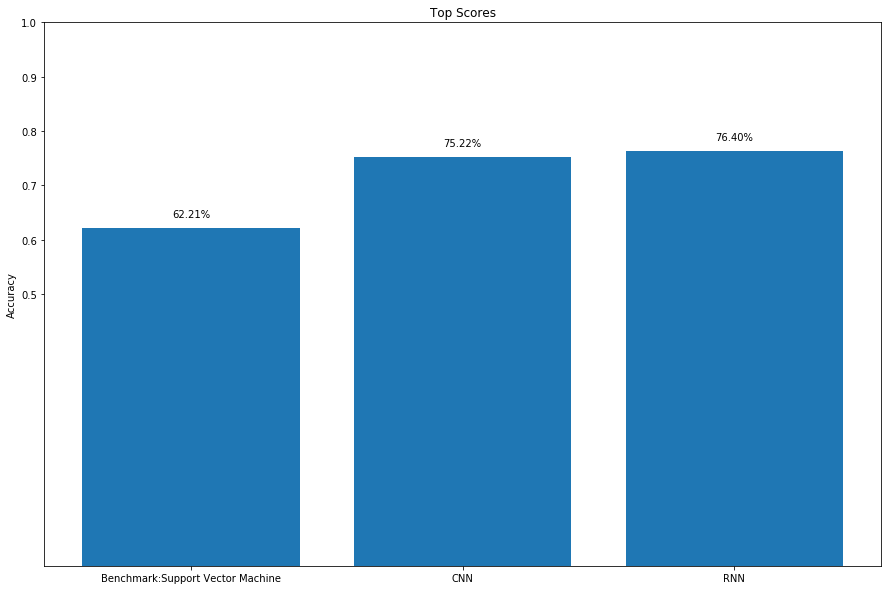

In [42]:
#Visualize results
from operator import itemgetter
best_benchmark = 'Benchmark:' + max(scores,key=itemgetter(1))[0]

labels = [best_benchmark, 'CNN', 'RNN']
acc = [max(scores,key=itemgetter(1))[1], cnn_eval[1], rnn_eval[1]]

plt.figure(figsize = (15, 10))
plt.bar(labels, acc)
for i in range(3):
    plt.text(labels[i], acc[i] + .02, ("%.2f" %(acc[i]*100)) +'%', ha='center')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.yticks([i/10 for i in range(5, 11)], [i*10/100 for i in range(5, 11)])
plt.title('Top Scores')
plt.show()

In [43]:
# Inspect Top model performance 
top_models = {'rnn': rnn_model, 'cnn': cnn_model}
histories = {'rnn_hist': rnn_history, 'cnn_hist': cnn_history}
best = 'c' if cnn_eval[1] > rnn_eval[1] else 'r'
best_model = top_models[best+'nn']
best_model_hist = histories[best + 'nn_hist']
print('Top Model Type:' ,best.upper()+'NN')
best_model.summary()

Top Model Type: RNN
Model: "model_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_92 (InputLayer)        (None, 30)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 30, 100)           13289300  
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 30, 100)           60400     
_________________________________________________________________
global_max_pooling1d_19 (Glo (None, 100)               0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 150)               15150     
_________________________________________________________________
dropout_38 (Dropout)         (None, 15

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'RNN Model Accuracy')

Text(0, 0.5, 'RNN Accuracy')

Text(0.5, 0, 'Epoch')

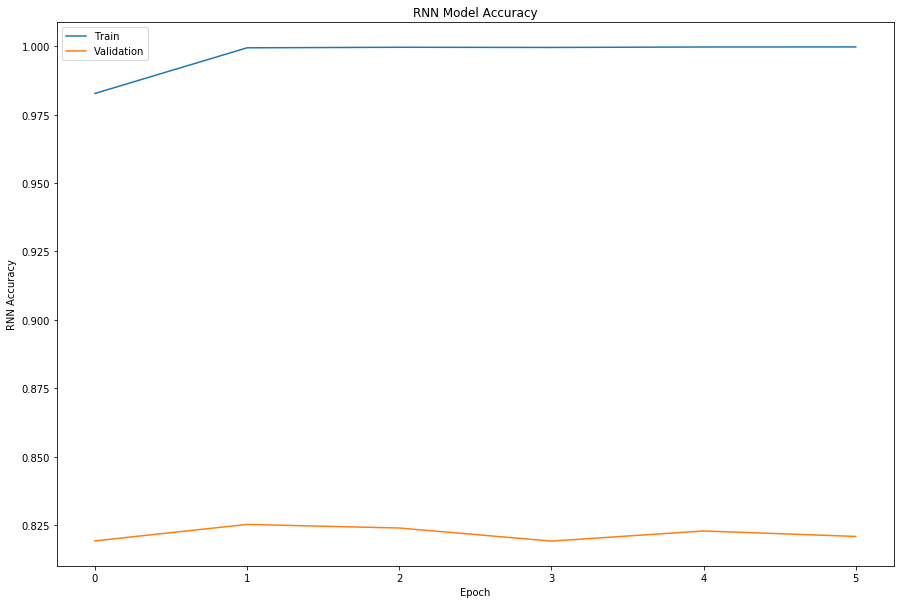

<Figure size 1080x720 with 0 Axes>

Text(0.5, 1.0, 'RNN Model Loss / Error')

Text(0, 0.5, 'RNN Loss / Error')

Text(0.5, 0, 'Epoch')

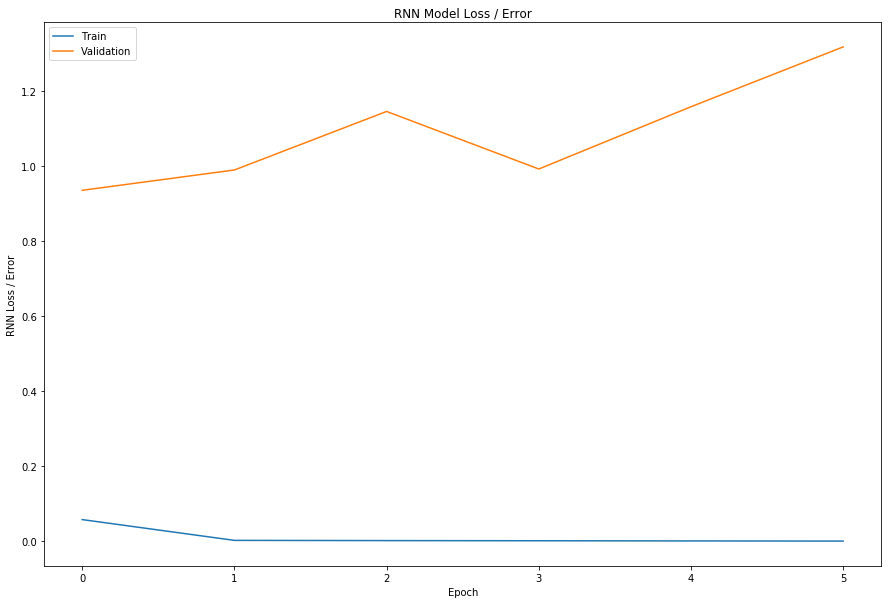

In [44]:
#Results history
# Display history for accuracy
plt.figure(figsize=(15, 10))
plt.plot(best_model_hist.history['accuracy'])
plt.plot(best_model_hist.history['val_accuracy'])
plt.title(best.upper()+'NN Model Accuracy')
plt.ylabel(best.upper() + 'NN Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Display history for loss
plt.figure(figsize=(15, 10))
plt.plot(best_model_hist.history['loss'])
plt.plot(best_model_hist.history['val_loss'])
plt.title(best.upper() + 'NN Model Loss / Error')
plt.ylabel(best.upper() + 'NN Loss / Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
#Confusion matrix and prediction
from sklearn.metrics import confusion_matrix, f1_score
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
F1 Score: 77.97


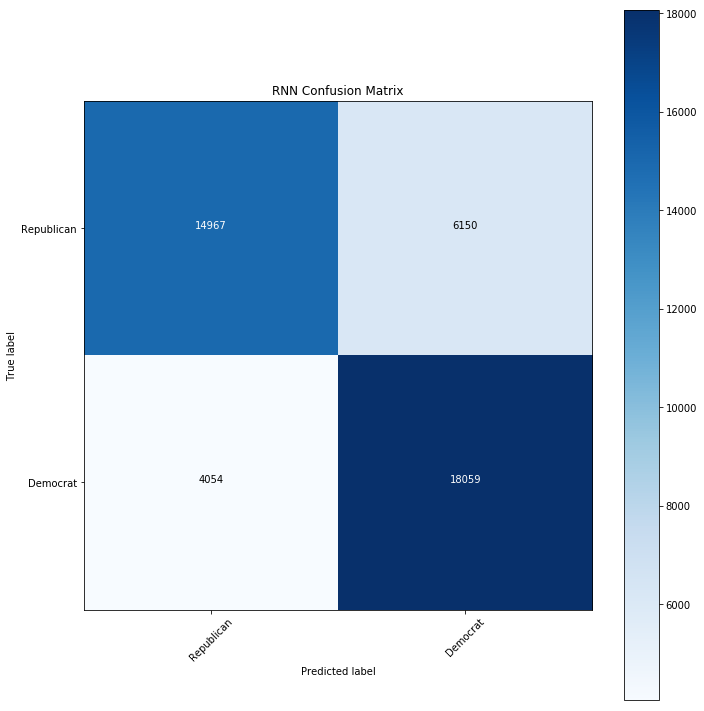

In [46]:
preds = np.argmax(best_model.predict(X_test), axis=1)
actual = np.argmax(y_test, axis=1)

cm = confusion_matrix(actual, preds)

#[1,0] = 0;[0,1] =1
#check y and target to confirm this
#(1,0) = Democrat
#(0,1) = Republican
#p1 = Repub. P2 = Democ

cm_plot_labels = ['Republican','Democrat']

plot_confusion_matrix(cm, cm_plot_labels, normalize=False, title=best.title() +'NN Confusion Matrix')

print('F1 Score: ' "%.2f" %(f1_score(actual, preds)*100))

In [47]:
# Save all predictions to dataframe
preds_df = pd.DataFrame.from_dict({'Predictions': preds, 'Actual': actual})
preds_df = preds_df.join(X_test_text.reset_index(drop=True))

# Create column to indicate if the prediction matches the actual
# 0 = Clinton; 1 = Trump
preds_df['Accuracy'] = preds_df['Predictions'] == preds_df['Actual']
preds_df.head()

,Actual,Predictions,text,bigrams,Accuracy
0,1,1,"[great, turnout, todays, rpc, meeting, looking...","[great, turnout, todays, rpc, meeting, looking...",True
1,1,1,"[rt, prcomnonprofit, us, congressman, jody, hi...","[rt, prcomnonprofit, us, congressman, jody, hi...",True
2,1,0,"[time, call, comes, constituent, needs, help, ...","[time, call, comes, constituent, needs, help, ...",False
3,0,0,"[la, diversidad, nos, hace, mas, fuertes, hace...","[la, diversidad, nos, hace, mas, fuertes, hace...",True
4,0,1,"[rt, fema, harvey, bringing, dangerous, storm,...","[rt, fema, harvey, bringing, dangerous, storm,...",False


In [48]:
df1=pd.read_csv('/home/asheshchoudhury/articles1.csv')
df2=pd.read_csv('/home/asheshchoudhury/articles2.csv')
df3=pd.read_csv('/home/asheshchoudhury/articles3.csv')
allarticles_df = pd.concat([df1,df2,df3])
allarticles_df.head(5)
len(allarticles_df)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


142570

In [49]:
# Take selected number of records to test
no_of_records = 142570


In [50]:
test_df = allarticles_df[['title','publication','date','month','year','content']].head(no_of_records)

In [51]:

clean_text = []
i = 0

for text in test_df['content']:
    i = i + 1
    # Remove accent characters => Expand Contractions => Remove special characters => Lammatize Text => Remove Stop Words
    no_accent_chars = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #expanded_text = expand_contractions(no_accent_chars)
    expanded_text = no_accent_chars 
    no_special_chars = remove_special_characters(expanded_text, remove_digits=False)
    #lem_text = lemmatize_text(no_special_chars)
    #filtered_text = remove_stopwords(lem_text)
    filtered_text = remove_stopwords(no_special_chars)
    
    # Make all text lowercase
    lowercase_text = filtered_text.lower()
    
    # Split text into list of words
    words = lowercase_text.split()
    clean_text.append(words)
    if (i%10000 == 0):
        print('Currently processing: %s of total %s records' %(i,no_of_records))

# Add cleaned text to dataframe
test_df['clean_content'] = clean_text


Currently processing: 10000 of total 142570 records
Currently processing: 20000 of total 142570 records
Currently processing: 30000 of total 142570 records
Currently processing: 40000 of total 142570 records
Currently processing: 50000 of total 142570 records
Currently processing: 60000 of total 142570 records
Currently processing: 70000 of total 142570 records
Currently processing: 80000 of total 142570 records
Currently processing: 90000 of total 142570 records
Currently processing: 100000 of total 142570 records
Currently processing: 110000 of total 142570 records
Currently processing: 120000 of total 142570 records
Currently processing: 130000 of total 142570 records
Currently processing: 140000 of total 142570 records


In [52]:
data = test_df['clean_content'].values
bigrams_data = []


for i in range(len(data)):
#    bigrams_data.append(bigrams[data[i]])
    bigrams_data.append([data[i]])
    
bigrams_data = np.array(bigrams_data)


In [53]:
bigrams_joined = []

for a in bigrams_data:
    for b in a:
        bigrams_joined.append(' '.join(b))

# Remove underscore from filters and no need to convert to lowercase
#tokenizer = text.Tokenizer(filters='!"#%&()*+,./:;<=>?@[\\]^`{|}~\t\n', lower=False)
tokenizer.fit_on_texts(bigrams_joined)
sequences = tokenizer.texts_to_sequences(bigrams_joined)

word_index = tokenizer.word_index
print('Total Words in Vocabulary: {}' .format(len(word_index)))

Total Words in Vocabulary: 435327


In [54]:
X_t = pad_sequences(sequences, maxlen=max_len, padding='post')
X_t_df = pd.DataFrame(X_t)
#X_t_df['bigrams'] = bigrams_data
#X_t_df['text'] = df.reset_index(drop=True)['clean_tweet']
len(X_t_df)

142570

In [55]:
X_t_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
142565,2328,194,918,7083,975,871,26414,2413,1436,9209,...,1428,25629,813,530,85,188,62,29,871,378
142566,11081,216312,57497,1136,137,2698,98641,216313,857,476,...,216312,57497,1136,137,2698,98641,216313,857,476,96
142567,212,39,644,742,1834,3421,1432,340,7,86,...,5778,38480,2,20247,18195,15688,533,5403,218,23258
142568,888,14040,17348,4,525,47,1113,287,11,604,...,508,669,625,163,796,3134,4857,390,26,137
142569,1042,2510,34453,1580,466,764,4989,82,10,35,...,15,5,54,1856,10,2474,122,1415,1436,2733


In [56]:
a = X_t_df.shape[0]
b = X_t_df.shape[1]

In [88]:
#Ensure the maximun embedding lenght of training set(132893) retains in test set. 
X_t_maxembeddinglen_adjusted_df = []
for i in range(a):
    for j in range(b):
        if (X_t_df[j][i]) > 132893: 
            X_t_df[j][i] = 132892


In [89]:
#Predict Political Afflication
political_affliation_pred_D0_R1 = np.argmax(rnn_model.predict(X_t_df), axis=1)
political_affliation_pred_D0_R1

array([0, 1, 1, ..., 0, 0, 0])

In [90]:
# Predict Political leaning (proxy of Bias)
political_affliation_measure=rnn_model.predict(X_t_df)

In [91]:
#Append Political Leaning in DF
democrat_affliation = []
republican_affliation = []
for i in range(len(X_t_df)):
    democrat_affliation.append(political_affliation_measure[i][0])
    republican_affliation.append(political_affliation_measure[i][1])   

In [92]:
test_df['political_affliation_pred_D0_R1'] = political_affliation_pred_D0_R1
test_df['democrat_affliation'] = democrat_affliation
test_df['republican_affliation'] = republican_affliation


In [93]:
test_df.loc[(test_df['republican_affliation'] > 0.30) & (test_df['republican_affliation'] < 0.70)].head(4)
test_df['political_affliation_pred_D0_R1'].describe()

,title,publication,date,month,year,content,clean_content,political_affliation_pred_D0_R1,democrat_affliation,republican_affliation
18,Suicide Bombing in Baghdad Kills at Least 36 -...,New York Times,2017-01-03,1.0,2017.0,BAGHDAD — A suicide bomber detonated a pick...,"[baghdad, suicide, bomber, detonated, pickup, ...",1,0.369008,0.630992
20,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",New York Times,2017-01-03,1.0,2017.0,When the Green Bay Packers lost to the Washing...,"[green, bay, packers, lost, washington, redski...",0,0.694885,0.305115
43,Trump Appears to Side With Assange Over Intell...,New York Times,2017-01-05,1.0,2017.0,■ Donald J. Trump appears to side with the W...,"[donald, j, trump, appears, side, wikileaks, f...",0,0.537654,0.462346
80,"Coal Fire, Not Just Iceberg, Doomed the Titani...",New York Times,2017-01-04,1.0,2017.0,LONDON — Maybe it wasn’t just the iceberg. ...,"[london, maybe, wasnt, iceberg, ever, since, t...",1,0.318422,0.681578


count    142570.000000
mean          0.510269
std           0.499896
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: political_affliation_pred_D0_R1, dtype: float64

In [85]:
publications = test_df['publication'].unique()

In [64]:
Republican_affliation =[]
publicatation_house = []
Republican_1_or_Democrat_0_classification =[]

for i in publications:
    publicatation_house.append(i)
    Republican_affliation.append("%.1f" %(test_df.loc[test_df['publication'] == i]['republican_affliation'].mean()*100))
    Republican_1_or_Democrat_0_classification.append("%.1f" %(test_df.loc[test_df['publication'] == i]['political_affliation_pred_D0_R1'].mean()*100))
    #"%.2f" %(f1_score(actual, preds)*100))
    #print("%.1f" %(test_df.loc[test_df['publication'] == i]['republican_affliation'].mean()*100))

In [65]:
publicatation_house

['New York Times',
 'Breitbart',
 'CNN',
 'Business Insider',
 'Atlantic',
 'Fox News',
 'Talking Points Memo',
 'Buzzfeed News',
 'National Review',
 'New York Post',
 'Guardian',
 'NPR',
 'Reuters',
 'Vox',
 'Washington Post']

In [66]:
Republican_affliation

['54.1',
 '43.9',
 '53.4',
 '52.9',
 '53.7',
 '46.3',
 '57.9',
 '54.2',
 '55.5',
 '53.4',
 '54.4',
 '55.2',
 '43.5',
 '51.5',
 '50.6']

In [67]:
Republican_1_or_Democrat_0_classification

['54.2',
 '43.9',
 '53.3',
 '52.3',
 '53.8',
 '46.2',
 '58.2',
 '54.0',
 '55.5',
 '53.4',
 '54.4',
 '55.3',
 '42.8',
 '51.4',
 '50.5']

In [68]:
#Divide Publishing houses
Breitbart_df = test_df.loc[test_df['publication'] == 'Breitbart']
CNN_df = test_df.loc[test_df['publication'] == 'CNN']
Fox_df = test_df.loc[test_df['publication'] == 'Fox News']
Washington_Post_df = test_df.loc[test_df['publication'] == 'Washington Post']
NYT_df = test_df.loc[test_df['publication'] == 'New York Times']
NYT_republican_affliation_df = NYT_df['republican_affliation']
NYT_df.head(2)

,title,publication,date,month,year,content,clean_content,political_affliation_pred_D0_R1,democrat_affliation,republican_affliation
0,House Republicans Fret About Winning Their Hea...,New York Times,2016-12-31,12.0,2016.0,WASHINGTON — Congressional Republicans have...,"[washington, congressional, republicans, new, ...",0,9.993735e-01,0.000626
1,Rift Between Officers and Residents as Killing...,New York Times,2017-06-19,6.0,2017.0,"After the bullet shells get counted, the blood...","[bullet, shells, get, counted, blood, dries, v...",1,3.353254e-07,1.000000


In [69]:
NYT_all_coloumn_df = NYT_df
NYT_df['datetime'] = pd.to_datetime(NYT_df['date'])
NYT_df = NYT_df.set_index('datetime')
NYT_df.drop(['title','publication','date','month','year','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
NYT_df.head()

,republican_affliation
datetime,
2016-12-31,0.000626
2017-06-19,1.000000
2017-01-06,0.999997
2017-04-10,0.999408
2017-01-02,0.000002


In [70]:
#Take monthly mean of Republican afflition
NYT_monthlymean_df = NYT_df.resample('M').mean()
NYT_monthlymean_df.head()

,republican_affliation
datetime,
2014-05-31,1.089251e-09
2014-06-30,NaN
2014-07-31,NaN
2014-08-31,NaN
2014-09-30,NaN


In [71]:
NYT_monthlymean_df['Date'] = NYT_monthlymean_df.index.date
NYT_monthlymean_df['Year'] = NYT_monthlymean_df.index.year
NYT_monthlymean_df['Month'] = NYT_monthlymean_df.index.month
NYT_monthlymean_df['Day'] = NYT_monthlymean_df.index.day
NYT_monthlymean_df['Weekday']= NYT_monthlymean_df.index.weekday_name
NYT_monthlymean_df['Year_Month']= NYT_monthlymean_df.Year.astype(str) + '-'+ NYT_monthlymean_df.Month.astype(str)  
NYT_monthlymean_df['NYT_republican_affliation'] = NYT_monthlymean_df['republican_affliation']
NYT_monthlymean_df.drop(['Date','Year','Month','Day','Weekday','republican_affliation'], axis=1, inplace=True)
NYT_monthlymean_df.tail()

,Year_Month,NYT_republican_affliation
datetime,,
2017-02-28,2017-2,0.525484
2017-03-31,2017-3,0.519023
2017-04-30,2017-4,0.562040
2017-05-31,2017-5,0.487805
2017-06-30,2017-6,0.582949


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0.5, 0, 'Time')

Text(0, 0.5, 'NYT monthly mean Republican Affliation')

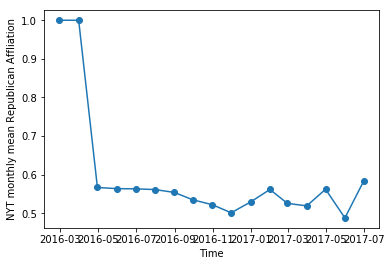

In [72]:
start = '2016'
end = '2018'

plt.plot(NYT_monthlymean_df.loc[start:end, 'NYT_republican_affliation'], marker='o', linestyle='-')
plt.xlabel('Time', fontsize=10)
plt.ylabel('NYT monthly mean Republican Affliation', fontsize=10)

#ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))



In [73]:
CNN_df['datetime'] = pd.to_datetime(CNN_df['date'])
CNN_df = CNN_df.set_index('datetime')
CNN_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
CNN_monthlymean_df = CNN_df.resample('M').mean()
CNN_monthlymean_df['Year_Month'] = CNN_monthlymean_df.index.year.astype(str) + '-'+ CNN_monthlymean_df.index.month.astype(str)
CNN_monthlymean_df['CNN_republican_affliation'] = CNN_monthlymean_df['republican_affliation']  
CNN_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
CNN_monthlymean_df.tail()


,Year_Month,CNN_republican_affliation
datetime,,
2017-02-28,2017-2,0.557624
2017-03-31,2017-3,0.552683
2017-04-30,2017-4,0.550359
2017-05-31,2017-5,0.544481
2017-06-30,2017-6,0.537957


In [74]:
Breitbart_df['datetime'] = pd.to_datetime(Breitbart_df['date'])
Breitbart_df = Breitbart_df.set_index('datetime')
Breitbart_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
Breitbart_monthlymean_df = Breitbart_df.resample('M').mean()
Breitbart_monthlymean_df['Year_Month'] = Breitbart_monthlymean_df.index.year.astype(str) + '-'+ Breitbart_monthlymean_df.index.month.astype(str)
Breitbart_monthlymean_df['Breitbart_republican_affliation'] = Breitbart_monthlymean_df['republican_affliation']  
Breitbart_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
Breitbart_monthlymean_df.tail()


,Year_Month,Breitbart_republican_affliation
datetime,,
2017-02-28,2017-2,0.430029
2017-03-31,2017-3,0.440551
2017-04-30,2017-4,0.418934
2017-05-31,2017-5,0.439842
2017-06-30,2017-6,0.424214


In [75]:
Fox_df['datetime'] = pd.to_datetime(Fox_df['date'])
Fox_df = Fox_df.set_index('datetime')
Fox_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
Fox_monthlymean_df = Fox_df.resample('M').mean()
Fox_monthlymean_df['Year_Month'] = Fox_monthlymean_df.index.year.astype(str) + '-'+ Fox_monthlymean_df.index.month.astype(str)
Fox_monthlymean_df['Fox_republican_affliation'] = Fox_monthlymean_df['republican_affliation']  
Fox_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
Fox_monthlymean_df.tail()


,Year_Month,Fox_republican_affliation
datetime,,
2016-08-31,2016-8,0.495085
2016-09-30,2016-9,0.482877
2016-10-31,2016-10,0.381983
2016-11-30,2016-11,0.500770
2016-12-31,2016-12,0.419660


In [76]:
Washington_Post_df['datetime'] = pd.to_datetime(Washington_Post_df['date'])
Washington_Post_df = Washington_Post_df.set_index('datetime')
Washington_Post_df.drop(['title','publication','date','year','month','content','clean_content','political_affliation_pred_D0_R1','democrat_affliation'], axis=1, inplace=True)
Washington_Post_monthlymean_df = Washington_Post_df.resample('M').mean()
Washington_Post_monthlymean_df['Year_Month'] = Washington_Post_monthlymean_df.index.year.astype(str) + '-'+ Washington_Post_monthlymean_df.index.month.astype(str)
Washington_Post_monthlymean_df['Washington_Post_republican_affliation'] = Washington_Post_monthlymean_df['republican_affliation']  
Washington_Post_monthlymean_df.drop(['republican_affliation'], axis=1, inplace=True)
Washington_Post_monthlymean_df.tail()


,Year_Month,Washington_Post_republican_affliation
datetime,,
2017-03-31,2017-3,0.499985
2017-04-30,2017-4,0.494937
2017-05-31,2017-5,0.507496
2017-06-30,2017-6,0.501538
2017-07-31,2017-7,0.555159


In [77]:
d1_df  = pd.merge(NYT_monthlymean_df, CNN_monthlymean_df, on='Year_Month', how='outer')
d2_df = pd.merge(Washington_Post_monthlymean_df,d1_df, on='Year_Month', how='outer')
d3_df = pd.merge(Breitbart_monthlymean_df,d2_df, on='Year_Month', how='outer')
News_monthlymean_df = pd.merge(Fox_monthlymean_df,d3_df, on='Year_Month', how='outer')
News_monthlymean_df['datetime'] = pd.to_datetime(News_monthlymean_df['Year_Month'])
News_monthlymean_df = News_monthlymean_df.set_index('datetime')

In [78]:
News_monthlymean_df.head()

,Year_Month,Fox_republican_affliation,Breitbart_republican_affliation,Washington_Post_republican_affliation,NYT_republican_affliation,CNN_republican_affliation
datetime,,,,,,
2004-06-01,2004-6,0.000567,NaN,NaN,NaN,NaN
2004-07-01,2004-7,NaN,NaN,NaN,NaN,NaN
2004-08-01,2004-8,NaN,NaN,NaN,NaN,NaN
2004-09-01,2004-9,NaN,NaN,NaN,NaN,NaN
2004-10-01,2004-10,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Time')

Text(0, 0.5, 'NYT monthly mean Republican Affliation')

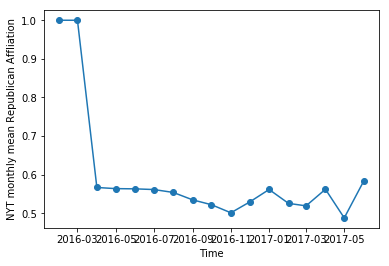

In [79]:
ax = plt
ax.plot(News_monthlymean_df.loc['2016-01':'2017-08', 'NYT_republican_affliation'], marker='o', linestyle='-')
plt.xlabel('Time', fontsize=10)
plt.ylabel('NYT monthly mean Republican Affliation', fontsize=10)



Text(0.5, 0, 'Time')

Text(0, 0.5, 'Monthly mean Republican Affliation across different media publishers')

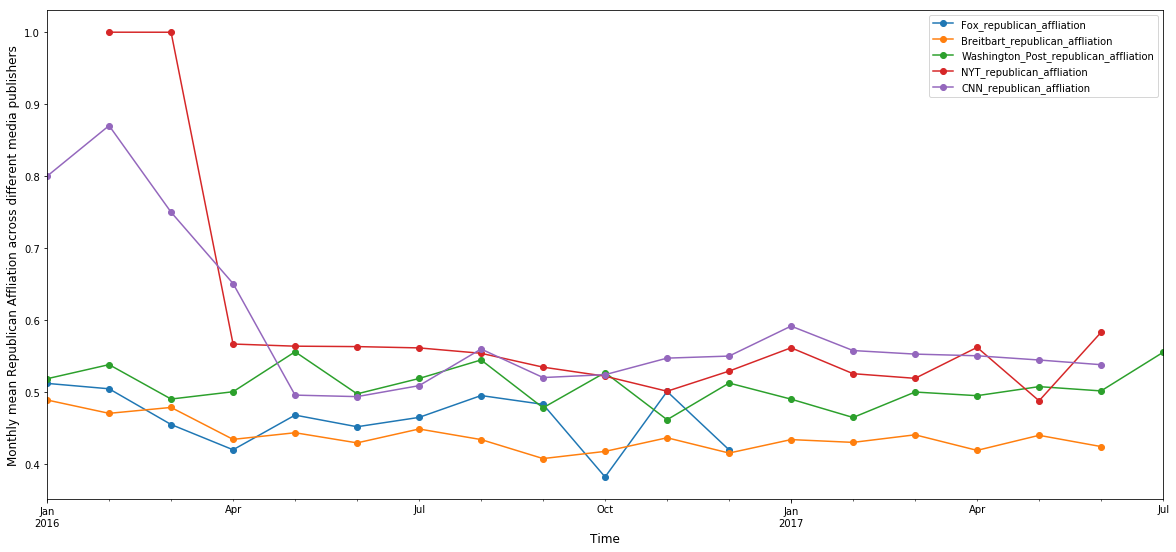

In [82]:
cols_plot = ['Fox_republican_affliation', 'Breitbart_republican_affliation', 'Washington_Post_republican_affliation','NYT_republican_affliation','CNN_republican_affliation']
axes = News_monthlymean_df.loc['2016':'2018'][cols_plot].plot(marker='o', linestyle='-', figsize=(20, 9), subplots=False)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Monthly mean Republican Affliation across different media publishers', fontsize=12)



,republican_affliation,Date,Year,Month,Day,Weekday,Year_Month
datetime,,,,,,,
2017-06-15,0.502872,2017-06-15,2017,6,15,Thursday,2017-6
2017-06-16,1.000000,2017-06-16,2017,6,16,Friday,2017-6
2017-06-17,NaN,2017-06-17,2017,6,17,Saturday,2017-6
2017-06-18,NaN,2017-06-18,2017,6,18,Sunday,2017-6
2017-06-19,0.663796,2017-06-19,2017,6,19,Monday,2017-6


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Monthly Republican Affliations in NYT ')

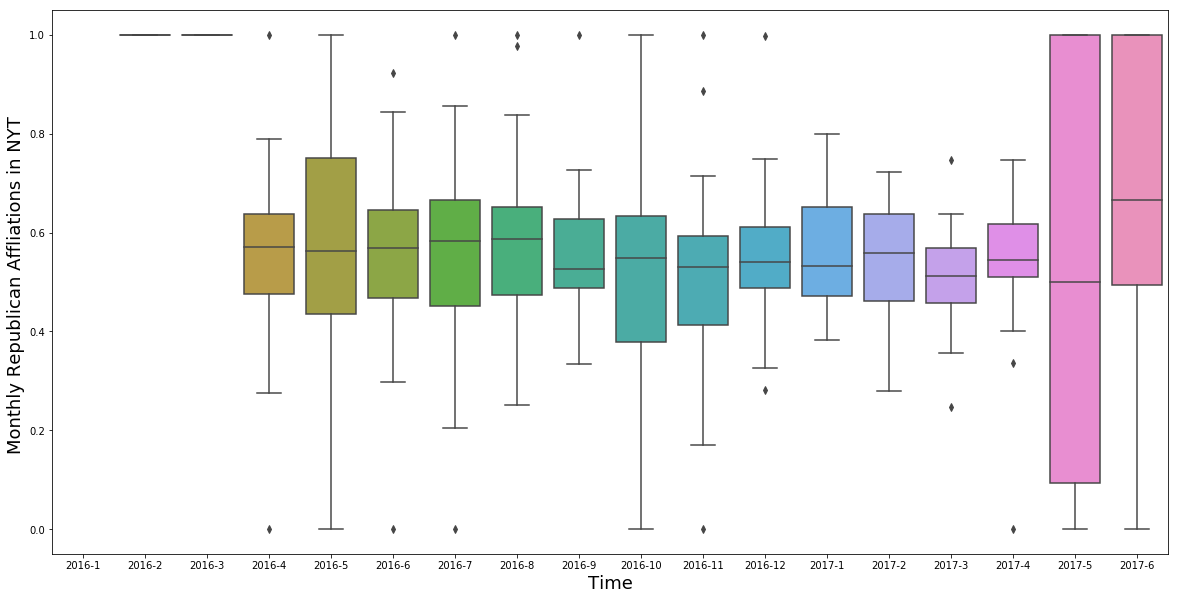

In [81]:
#Bar plot for monthly range of daily Republican affliations
NYT_dailymean_df = NYT_df.resample('D').mean()
NYT_dailymean_df['Date'] = NYT_dailymean_df.index.date
NYT_dailymean_df['Year'] = NYT_dailymean_df.index.year
NYT_dailymean_df['Month'] = NYT_dailymean_df.index.month
NYT_dailymean_df['Day'] = NYT_dailymean_df.index.day
NYT_dailymean_df['Weekday']= NYT_dailymean_df.index.weekday_name
NYT_dailymean_df['Year_Month']= df['var3'] = NYT_dailymean_df.Year.astype(str) + '-'+ NYT_dailymean_df.Month.astype(str)  
NYT_dailymean_df['republican_affliation'] = NYT_dailymean_df['republican_affliation']
NYT_dailymean_df.tail()
ax = plt.figure(figsize=(20,10))
sns.boxplot(data=NYT_dailymean_df.loc['2016-01':'2017-08'], x='Year_Month', y='republican_affliation');
#ax.set_title('tt')
plt.xlabel('Time', fontsize=18)
plt.ylabel('Monthly Republican Affliations in NYT ', fontsize=18)

